In [5]:
import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

In [1]:
pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.3 MB/s 


In [3]:
#Read the attributes
#lines = list(csv.reader(open('/content/drive/MyDrive/PGM/WebinarPGM/heartDisease.csv', 'r')));
#attributes = lines[0]
attributes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']

heartDisease = pd.read_csv('/content/drive/MyDrive/PGM/WebinarPGM/DatasetColabFiles/heartDisease.csv',names=attributes)
heartDisease = heartDisease.replace('?', np.nan)


# Display the data
print('Few examples from the dataset are given below')
print(heartDisease.head())
#print('\nAttributes and datatypes')
print(heartDisease.dtypes)


Few examples from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca               object
thal             object

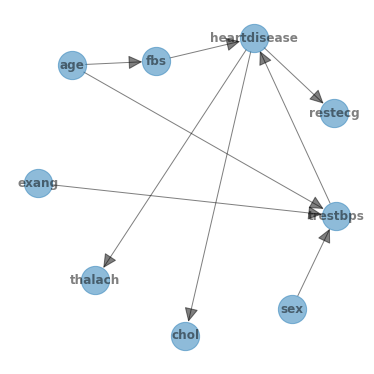


Learning CPDs using Maximum Likelihood Estimators...


In [7]:
# Model Baysian Network
import matplotlib.pyplot as plt
import networkx as nx

model = BayesianModel([('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'),
                       ('exang', 'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),
                       ('heartdisease','restecg'),('heartdisease','thalach'),('heartdisease','chol')])

plt.figure(1,figsize=(5,5))
nx.draw(model, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold")
plt.show()

# Learning CPDs using Maximum Likelihood Estimators
print('\nLearning CPDs using Maximum Likelihood Estimators...');
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)


In [8]:
# Inferencing with Bayesian Network
print('\nInferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)


Inferencing with Bayesian Network:


In [9]:
# Computing the probability of HeartDisease given Age.
print('\n1.Probability of HeartDisease given Age=20')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age': 28})
print(q)



1.Probability of HeartDisease given Age=20


/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:542: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.5932 |
+-----------------+---------------------+
| heartdisease(1) |              0.1714 |
+-----------------+---------------------+
| heartdisease(2) |              0.0811 |
+-----------------+---------------------+
| heartdisease(3) |              0.1138 |
+-----------------+---------------------+
| heartdisease(4) |              0.0405 |
+-----------------+---------------------+


In [10]:
print('\n2. Probability of HeartDisease given chol (Cholestoral) =100')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'chol': 100})
print(q)


2. Probability of HeartDisease given chol (Cholestoral) =100


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              1.0000 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.0000 |
+-----------------+---------------------+
| heartdisease(3) |              0.0000 |
+-----------------+---------------------+
| heartdisease(4) |              0.0000 |
+-----------------+---------------------+


#Structure Learning

In [11]:
from itertools import combinations

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score,BDeuScore,BicScore,BDsScore
from pgmpy.sampling import BayesianModelSampling

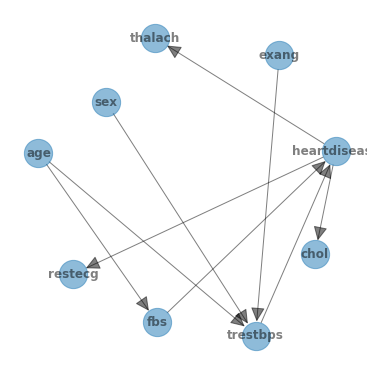

In [12]:
# Model Baysian Network
model = BayesianModel([('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'),
                       ('exang', 'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),
                       ('heartdisease','restecg'),('heartdisease','thalach'),('heartdisease','chol')])

plt.figure(1,figsize=(5,5))
nx.draw(model, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold")
plt.show()

In [13]:
# Funtion to evaluate the learned model structures.
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    print(nodes)
    est_adj = nx.to_numpy_matrix(
        estimated_model.to_undirected(), nodelist=nodes, weight=None
    )
    true_adj = nx.to_numpy_matrix(
        true_model.to_undirected(), nodelist=nodes, weight=None
    )
    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    print("F1-score for the model skeleton: ", f1)

  0%|          | 0/4 [00:00<?, ?it/s]

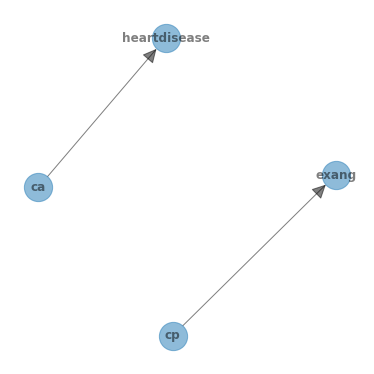

[('ca', 'heartdisease'), ('cp', 'exang')]


In [14]:
# Using PC

estPC = PC(data=heartDisease)
estimated_modelPC = estPC.estimate(variant="stable", max_cond_vars=4)
plt.figure(1,figsize=(5,5))
nx.draw(
    estimated_modelPC, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold"
)
plt.show()
print(estimated_modelPC.edges())


  0%|          | 0/1000 [00:00<?, ?it/s]

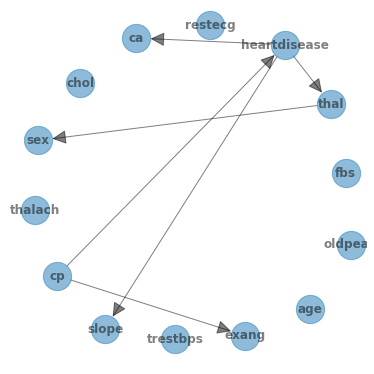

[('cp', 'exang'), ('cp', 'heartdisease'), ('thal', 'sex'), ('heartdisease', 'thal'), ('heartdisease', 'ca'), ('heartdisease', 'slope')]


  0%|          | 0/1000 [00:00<?, ?it/s]

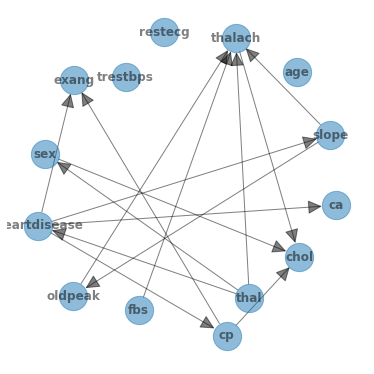

  0%|          | 0/1000 [00:00<?, ?it/s]

[('sex', 'chol'), ('cp', 'exang'), ('cp', 'chol'), ('fbs', 'thalach'), ('thalach', 'chol'), ('oldpeak', 'thalach'), ('slope', 'oldpeak'), ('slope', 'thalach'), ('thal', 'heartdisease'), ('thal', 'sex'), ('thal', 'thalach'), ('heartdisease', 'ca'), ('heartdisease', 'cp'), ('heartdisease', 'slope'), ('heartdisease', 'exang')]


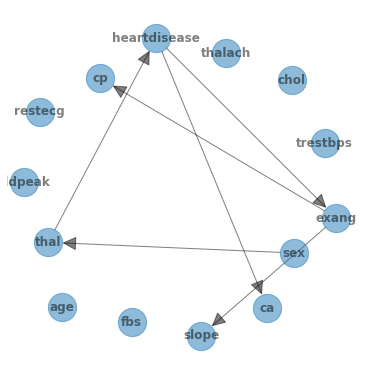

[('sex', 'thal'), ('exang', 'cp'), ('exang', 'slope'), ('thal', 'heartdisease'), ('heartdisease', 'exang'), ('heartdisease', 'ca')]


  0%|          | 0/1000 [00:00<?, ?it/s]

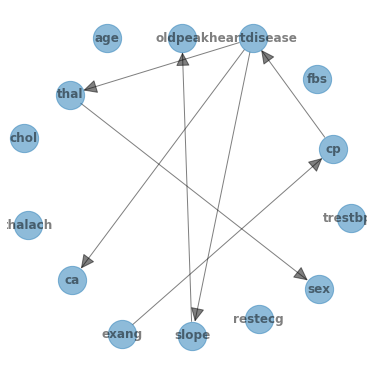

[('cp', 'heartdisease'), ('exang', 'cp'), ('slope', 'oldpeak'), ('thal', 'sex'), ('heartdisease', 'thal'), ('heartdisease', 'ca'), ('heartdisease', 'slope')]


In [16]:
# Using HillClimbingSearch and different scoring techniques

scoring_method1 = BDeuScore(data=heartDisease,equivalent_sample_size=5)
scoring_method2 = K2Score(data=heartDisease)
scoring_method3 = BicScore(data=heartDisease)
scoring_method4 = BDsScore(data=heartDisease)

estHCL = HillClimbSearch(data=heartDisease)

estimated_model1 = estHCL.estimate( scoring_method=scoring_method1,max_indegree=4, max_iter=int(1e3))
plt.figure(1,figsize=(5,5))
nx.draw(
    estimated_model1, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold"
)
plt.show()
print(estimated_model1.edges())

estimated_model2 = estHCL.estimate( scoring_method=scoring_method2,max_indegree=4, max_iter=int(1e3))
plt.figure(1,figsize=(5,5))
nx.draw(
    estimated_model2, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold"
)
plt.show()
print(estimated_model2.edges())

estimated_model3 = estHCL.estimate( scoring_method=scoring_method3,max_indegree=4, max_iter=int(1e3))
plt.figure(1,figsize=(5,5))
nx.draw(
    estimated_model3, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold"
)
plt.show()
print(estimated_model3.edges())

estimated_model4 = estHCL.estimate( scoring_method=scoring_method4,max_indegree=4, max_iter=int(1e3))
plt.figure(1,figsize=(5,5))
nx.draw(
    estimated_model4, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold"
)
plt.show()
print(estimated_model4.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

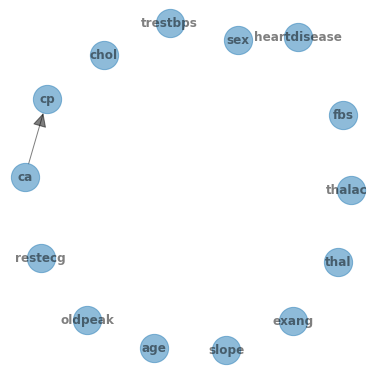

[('ca', 'cp')]


In [ ]:
from pgmpy.estimators import MmhcEstimator

estMMHC = MmhcEstimator(data=heartDisease)

estimated_modelMMHC = estMMHC.estimate()
plt.figure(1,figsize=(5,5))
nx.draw(
    estimated_modelMMHC, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight="bold"
)
plt.show()
print(estimated_modelMMHC.edges())

In [ ]:
get_f1_score(estimated_model, model)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']


NetworkXError: ignored